# Explore here

In [1]:
# Your code here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')


In [2]:
df.shape

(2999, 2)

In [3]:
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [4]:
df.duplicated().sum()

np.int64(630)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2993,https://www.theverge.com/2020/6/29/21306889/di...,False
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [7]:
df.reset_index()

,index,url,is_spam
0,0,https://briefingday.us8.list-manage.com/unsubs...,True
1,1,https://www.hvper.com/,True
2,2,https://briefingday.com/m/v4n3i4f3,True
3,3,https://briefingday.com/n/20200618/m#commentform,False
4,4,https://briefingday.com/fan,True
...,...,...,...
2364,2993,https://www.theverge.com/2020/6/29/21306889/di...,False
2365,2994,https://www.smartcitiesworld.net/news/news/dee...,False
2366,2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2367,2997,https://www.technologyreview.com/2019/12/20/13...,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 39.3+ KB


In [9]:
print(len(df[df['is_spam']==True]))
print(len(df[df['is_spam']==False]))


244
2125


In [10]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    return text.split()







In [11]:
df['url'] = df.url.apply(preprocess_text)
df

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True
...,...,...
2993,"[https, www, theverge, com, disney, deepfake, ...",False
2994,"[https, www, smartcitiesworld, net, news, news...",False
2996,"[https, techcrunch, com, an, optimistic, view,...",False
2997,"[https, www, technologyreview, com, this, star...",False


In [16]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")
stop_words.append('http')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df.url = df.url.apply(lemmatize_text)
df

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True
...,...,...
2993,"[theverge, disney, deepfake, face, swapping, r...",False
2994,"[smartcitiesworld, news, news, deepfake, techn...",False
2996,"[techcrunch, optimistic, view, deepfakes]",False
2997,"[technologyreview, startup, claim, deepfakes, ...",False


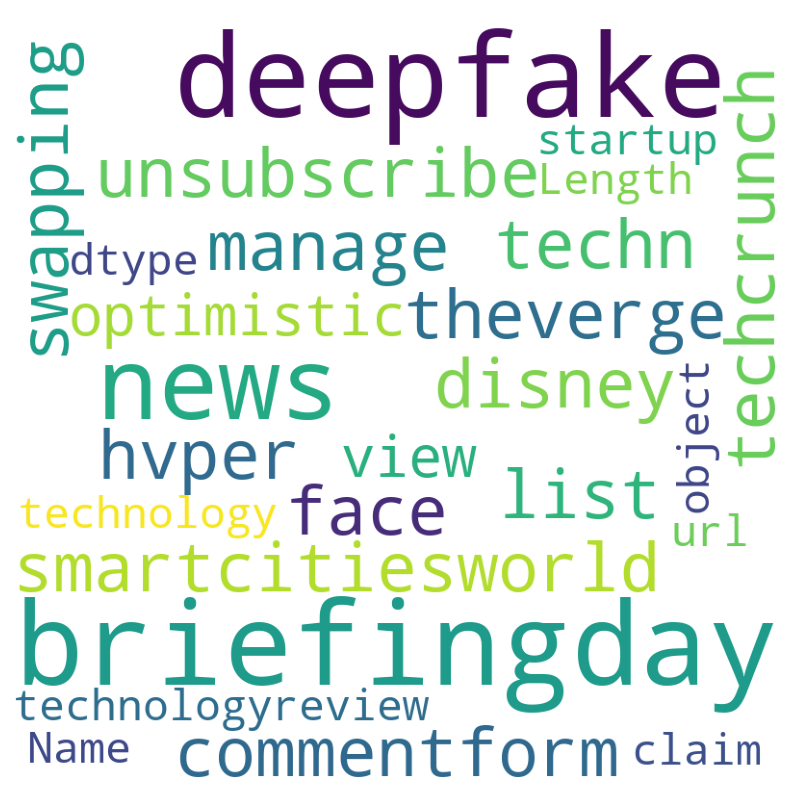

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "white", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df.url))

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()






In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = df.url
y = df.is_spam

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

tokens_list = [" ".join(tokens) for tokens in X_train]

tokens_list2 = [" ".join(tokens) for tokens in X_test]

X_train_vec = vectorizer.fit_transform(tokens_list).toarray()
X_test_vec = vectorizer.transform(tokens_list2).toarray()







['goldenhearts oldest golden retriever', 'wikipedia wiki essage ottle', 'subscribe washingtonpost newsletter bundle wapo', 'nytimes world serb renew crackdown albanian village kosovo html', 'nymag intelligencer peter stein lifeguard html', 'abcnews george floyds relative watch officer charged killing court story', 'nature article', 'apnews', 'morningbrew daily story week ahead june', 'morningbrew daily story spacex successfully launch human space', 'morningbrew daily story segway shut july', 'verbenergy trial', 'morningbrew daily', 'forbes site lisettevoytko uncle brand evolve following aunt jemimas removal', 'theverge european union travel coronavirus reopening border draft list', 'forbes site andrewsolender trump campaign manager registered ticket tulsa rallybut venue seat', 'youtube watch feature youtu', 'cnbc stock market future open close news html', 'creativecommons license', 'aljazeera indepth interactive infographic million coronavirus case html', 'reuters article mideast crisi

In [22]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train_vec,y_train)

SVC(kernel='linear', random_state=42)

In [23]:
y_pred = model.predict(X_test_vec)





In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)





0.9556962025316456

In [ ]:
- optimizar con hyperparametros
- aumentar el tamaño de la muestra
- Balancear el problema (SMOTE)
- probar otro modelo!!!!!



